In [1]:
import sys
import re
import os
from datetime import datetime
from time import sleep
from IPython.display import display, clear_output, HTML

# set working dir
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

import utils
from utils import *
import torch
import pandas as pd
import numpy as np
import torch
from glob import glob
import selenium
from tqdm.auto import tqdm

START_TS = datetime.now()
display(HTML(f'{START_TS} - Current working directory: <b>{WORKING_DIR}</b>'))

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import numba



2021-06-03 16:51:33,868 -INFO - config:config.py:16 - Module utils.config was loaded
2021-06-03 16:51:33,871 -INFO - common:common.py:616 - Module utils.common is loaded...
2021-06-03 16:51:33,873 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-06-03 16:51:33,875 -INFO - dataset_builder:dataset_builder.py:200 - dataset package is loaded...
2021-06-03 16:51:34,542 -INFO - dataset:dataset.py:653 - dataset module is loaded...


In [2]:
from utils import get_all_elements, iou_xywh, screenshot, maximize_window, get_parents_list, build_tree_dict, DatasetBuilder

In [3]:
selenium.__version__

'3.141.0'

# Parameters

In [4]:
SITE_URL = 'https://www.wildberries.ru/catalog/muzhchinam/odezhda/dzhinsy'
WAIT_TIME_SECONDS = 7

# LOGIN = 'Roman'
# PASSWORD = 'Jdi1234'
# SAVE_SCREEN = True
# HEADLESS = True #False

In [5]:
with open('dataset/classes.txt', 'r') as f:
    decoder_dict = { i:s.strip() for i, s in  enumerate(f.readlines())}
    encoder_dict = { v: k for k, v in decoder_dict.items()}
decoder_dict, encoder_dict

({0: 'button',
  1: 'link',
  2: 'textfield',
  3: 'dropdown',
  4: 'checkbox',
  5: 'radiobutton',
  6: 'textarea',
  7: 'fileinput',
  8: 'iframe',
  9: 'range',
  10: 'progressbar',
  11: 'datetimeselector',
  12: 'colorpicker',
  13: 'numberselector',
  14: 'dropdownselector',
  15: 'table',
  16: 'n/a'},
 {'button': 0,
  'link': 1,
  'textfield': 2,
  'dropdown': 3,
  'checkbox': 4,
  'radiobutton': 5,
  'textarea': 6,
  'fileinput': 7,
  'iframe': 8,
  'range': 9,
  'progressbar': 10,
  'datetimeselector': 11,
  'colorpicker': 12,
  'numberselector': 13,
  'dropdownselector': 14,
  'table': 15,
  'n/a': 16})

# Generate dataset

2021-06-03 16:51:34,618 -INFO - dataset_builder:dataset_builder.py:77 - Dataset name: wildberries
2021-06-03 16:51:34,619 -INFO - dataset_builder:dataset_builder.py:86 - Create directories to save the dataset
2021-06-03 16:51:34,620 -INFO - dataset_builder:dataset_builder.py:121 - Creating driver
2021-06-03 16:51:35,209 -INFO - dataset_builder:dataset_builder.py:129 - Chrome web driver is created
2021-06-03 16:51:35,210 -INFO - <ipython-input-6-4b19b8cf0906>:<ipython-input-6-4b19b8cf0906>:5 - getting page
2021-06-03 16:51:45,877 -INFO - dataset_builder:dataset_builder.py:132 - save scrinshot: dataset/images/wildberries.png
2021-06-03 16:51:48,528 -INFO - dataset_builder:dataset_builder.py:176 - Collect features using JS script
2021-06-03 16:51:53,840 -INFO - dataset_builder:dataset_builder.py:184 - Save html to dataset/html/wildberries.html
2021-06-03 16:51:53,915 -INFO - dataset_builder:dataset_builder.py:194 - Save parquet to dataset/df/wildberries.parquet
2021-06-03 16:51:55,263 -IN

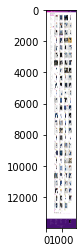

In [6]:
DATASET_NAME = 'wildberries'
class JDIDatasetBuilder(DatasetBuilder):

    def setUp(self, driver):
        self.logger.info(f'getting page')
        driver.get(SITE_URL)
        driver.set_window_size(width=1920, height=14000)
        
#         driver.find_element_by_id("user-icon").click()
#         driver.find_element_by_id("name").send_keys(LOGIN)
#         driver.find_element_by_id("password").send_keys(PASSWORD)
#         driver.find_element_by_id("login-button").click()
        sleep(WAIT_TIME_SECONDS)
        
#         driver.find_element_by_link_text("Service").click()
#         driver.find_element_by_link_text("Complex Table").click()
#         maximize_window(driver=driver)
        

with JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True) as builder:
    elements_df = builder.dataset
    plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))



In [7]:
df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')

In [8]:
df = build_features(df)

2021-06-03 16:51:57,768 -INFO - hidden:hidden.py:107 - build field "is_hidden"


In [9]:
elements_dict = build_elements_dict(df)

In [10]:
df[['tag_name', 'element_id', 'parent_id', 'upper_sibling', 'lower_sibling', 'displayed', 'is_hidden', 'x', 'y', 'width', 'height']]

tag_name                    element_id                     parent_id  \
0        HTML  3750626252283085340915449531                          None   
1        HEAD  0420004714283085345310370448  3750626252283085340915449531   
2        META  0851058480283085342971706232  0420004714283085345310370448   
3        META  6127415620283085345434923600  0420004714283085345310370448   
4        BASE  9872686766283085347937092467  0420004714283085345310370448   
...       ...                           ...                           ...   
6966   SCRIPT  2976284772283085447045405185  2627892852283085345188847408   
6967   SCRIPT  1007819034283085445870849172  2627892852283085345188847408   
6968   SCRIPT  1500383214283085442284916091  2627892852283085345188847408   
6969   SCRIPT  1837798594283085448507684230  2627892852283085345188847408   
6970   IFRAME  6004896683283085449258752676  2627892852283085345188847408   

                     upper_sibling                 lower_sibling  displayed  \
0                             None                          None       True   
1                             None  2627892852283085345188847408      False   
2                             None  6127415620283085345434923600      False   
3     0851058480283085342971706232  9872686766283085347937092467      False   
4     6127415620283085345434923600  9521436412283085343183515565      False   
...                            ...                           ...        ...   
6966  1820664996283085447599162660  1007819034283085445870849172      False   
6967  2976284772283085447045405185  1500383214283085442284916091      False   
6968  1007819034283085445870849172  1837798594283085448507684230      False   
6969  1500383214283085442284916091  6004896683283085449258752676      False   
6970  1837798594283085448507684230                          None      False   

      is_hidden    x    y   width  height  
0             0  0.0  0.0  1920.0   14000  
1             0  0.0  0.0     0.0       0  
2             0  0.0  0.0     0.0       0  
3             0  0.0  0.0     0.0       0  
4             0  0.0  0.0     0.0       0  
...         ...  ...  ...     ...     ...  
6966          1  0.0  0.0     0.0       0  
6967          1  0.0  0.0     0.0       0  
6968          1  0.0  0.0     0.0       0  
6969          1  0.0  0.0     0.0       0  
6970          1  0.0  0.0     0.0       0  

[6971 rows x 11 columns]

In [11]:
# img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
# img_height, img_width = img.shape
# print(img_width, img_height)
# plt.figure(figsize=(15, 100))
# plt.imshow(img, cmap='gray')

In [12]:
predictions_df = rule_base_predict(df)
print(predictions_df.shape)
# predictions_df

2021-06-03 16:52:00,813 -INFO - common:common.py:489 - Num radio buttons found: 27
2021-06-03 16:52:00,821 -INFO - common:common.py:493 - Num radio2 buttons found: 4
2021-06-03 16:52:00,826 -INFO - common:common.py:500 - Num checkboxes found: 0
2021-06-03 16:52:00,836 -INFO - common:common.py:507 - Num comboboxes/dropdowns found: 0
2021-06-03 16:52:00,842 -INFO - common:common.py:518 - Num textfields found: 3
2021-06-03 16:52:00,847 -INFO - common:common.py:523 - Num texfields for numbers found: 0
2021-06-03 16:52:00,853 -INFO - common:common.py:528 - Num ranges found: 0
2021-06-03 16:52:00,860 -INFO - common:common.py:533 - Num ordinary text inputs found: 0
2021-06-03 16:52:00,862 -INFO - common:common.py:536 - Num buttons found: 118
2021-06-03 16:52:00,868 -INFO - common:common.py:541 - Num buttons1 found: 0
2021-06-03 16:52:00,874 -INFO - common:common.py:546 - Num buttons2 (Material-UI) found: 0
2021-06-03 16:52:00,877 -INFO - common:common.py:551 - Num links found: 281
(177, 8)


In [13]:
predictions_df.columns

Index(['element_id', 'x', 'y', 'width', 'height', 'displayed', 'is_hidden',
       'label'],
      dtype='object')

In [14]:
radio_df = df[(df.tag_name == 'LABEL') & 
              df.attributes.apply(lambda x: x.get('class') == 'j-list-item filters-item') & 
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
radio_df['label'] = encoder_dict['radiobutton']
radio_df = radio_df[predictions_df.columns]

In [15]:
radio_df

element_id      x       y  width  height  displayed  \
659  2086504077283085367595803943  240.0  1047.0   30.0      30       True   
662  3502002940283085364093643812  284.0  1047.0   30.0      30       True   
665  5677200412283085367983781073  328.0  1047.0   30.0      30       True   
668  4871073289283085365475449485  372.0  1047.0   30.0      30       True   
671  1408708479283085363533059269  416.0  1047.0   30.0      30       True   
674  1989805341283085368668521549  460.0  1047.0   30.0      30       True   
677  3186948691283085363065541381  240.0  1091.0   30.0      30       True   
680  5602180968283085369626769622  284.0  1091.0   30.0      30       True   
683  3204524470283085369915004027  328.0  1091.0   30.0      30       True   
686  0841130392283085362053841149  372.0  1091.0   30.0      30       True   
689  8781610053283085363204463336  416.0  1091.0   30.0      30       True   
692  9893045391283085369269630464  460.0  1091.0   30.0      30       True   
695  2912525510283085367271620464  240.0  1135.0   30.0      30       True   

     is_hidden  label  
659          0      5  
662          0      5  
665          0      5  
668          0      5  
671          0      5  
674          0      5  
677          0      5  
680          0      5  
683          0      5  
686          0      5  
689          0      5  
692          0      5  
695          0      5

In [16]:
checkbox_df = df[(df.tag_name == 'LABEL') & 
              df.attributes.apply(lambda x: x.get('class') == 'j-list-item filters-item c-checkbox-withText-v1') & 
              df.displayed & (df.is_hidden == 0) & (df.width > 0.0) & (df.height>0.0)
             ].copy()
checkbox_df['label'] = encoder_dict['checkbox']
checkbox_df = checkbox_df[predictions_df.columns]
checkbox_df

element_id      x       y  width  height  displayed  \
407   8889468941283085353967620113  240.0   449.0  244.0      22       True   
408   8937777740283085356745361303  240.0   483.0  244.0      22       True   
409   1448642525283085359083152270  240.0   517.0  244.0      22       True   
410   1592538232283085353300961948  240.0   551.0  244.0      22       True   
411   9250088411283085359177110579  240.0   585.0  244.0      22       True   
...                            ...    ...     ...    ...     ...        ...   
2194  8037850057283085375183872465  240.0  5443.0  244.0      22       True   
2195  3602177003283085370941520634  240.0  5477.0  244.0      22       True   
2196  5694570345283085376211900817  240.0  5511.0  244.0      22       True   
2197  1789940758283085376343612748  240.0  5545.0  244.0      22       True   
2198  1207645616283085374632233130  240.0  5579.0  244.0      22       True   

      is_hidden  label  
407           0      4  
408           0      4  
409           0      4  
410           0      4  
411           0      4  
...         ...    ...  
2194          0      4  
2195          0      4  
2196          0      4  
2197          0      4  
2198          0      4  

[94 rows x 8 columns]

In [17]:
predictions_df = pd.concat([predictions_df, radio_df, checkbox_df])

1920 14000


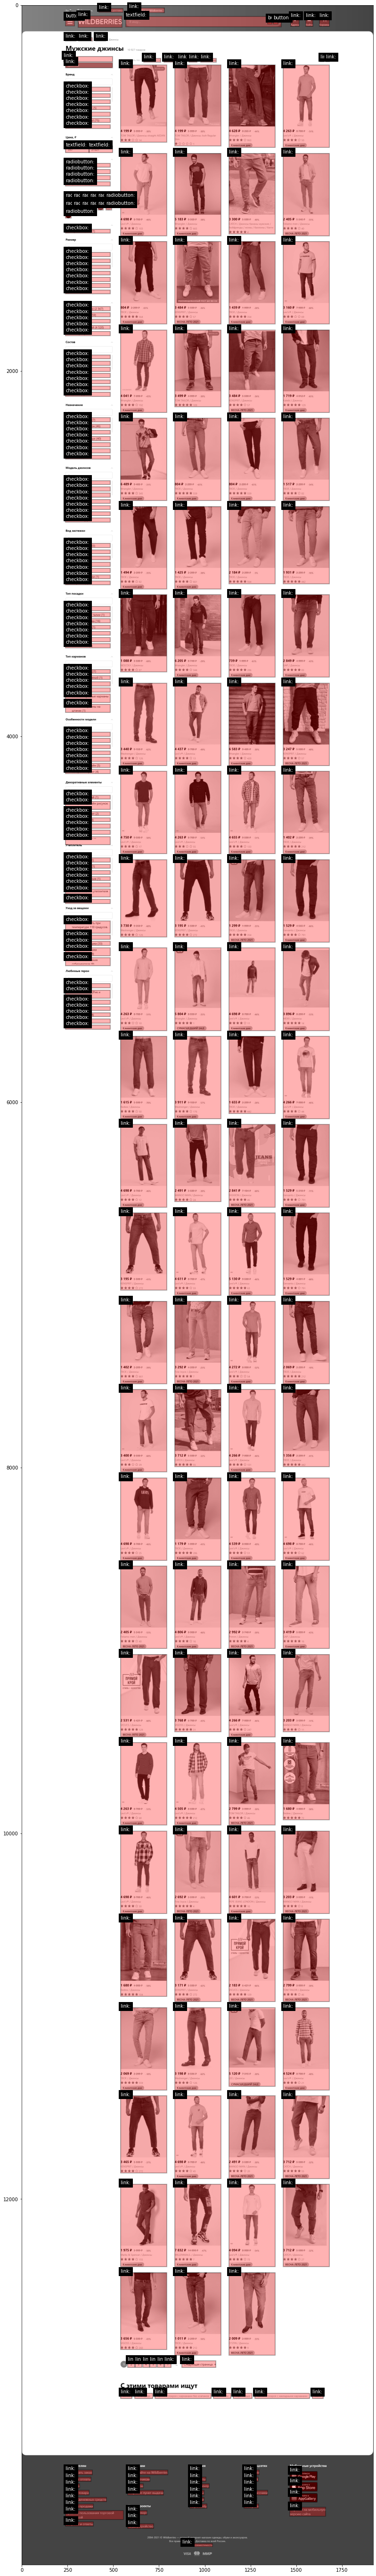

In [18]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in predictions_df.iterrows():
    
    patch = patches.Rectangle((r.x, r.y), r.width, r.height, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(r.x, r.y, 
             decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

# Generate and Save Labels

In [19]:
labels = build_to_yolo(df = predictions_df, img_width=img_width, img_heght=img_height)
labels

[[5.0, 0.188542, 0.062571, 0.127083, 0.001571],
 [5.0, 0.188542, 0.065, 0.127083, 0.001571],
 [5.0, 0.188542, 0.067429, 0.127083, 0.001571],
 [5.0, 0.188542, 0.069857, 0.127083, 0.001571],
 [2.0, 0.517131, 0.006429, 0.442594, 0.004],
 [2.0, 0.158333, 0.056357, 0.066667, 0.002571],
 [2.0, 0.225, 0.056357, 0.066667, 0.002571],
 [0.0, 0.1375, 0.006429, 0.025, 0.003429],
 [0.0, 0.706136, 0.006429, 0.0125, 0.001714],
 [0.0, 0.722803, 0.006429, 0.0125, 0.001714],
 [1.0, 0.253707, 0.002071, 0.069214, 0.001429],
 [1.0, 0.355465, 0.002071, 0.100968, 0.001857],
 [1.0, 0.222917, 0.006429, 0.125, 0.004571],
 [1.0, 0.777445, 0.006429, 0.023869, 0.003786],
 [1.0, 0.818091, 0.006429, 0.019922, 0.003786],
 [1.0, 0.860901, 0.006429, 0.028198, 0.003786],
 [1.0, 0.139221, 0.013393, 0.028442, 0.001357],
 [1.0, 0.181999, 0.013393, 0.038916, 0.001357],
 [1.0, 0.224776, 0.013393, 0.028442, 0.001357],
 [1.0, 0.188542, 0.021143, 0.139583, 0.002],
 [1.0, 0.191667, 0.0235, 0.133333, 0.002],
 [1.0, 0.370866, 0.02

In [20]:
labeled_df = pd.DataFrame(labels, columns=['label', 'x', 'y', 'width', 'height'])
labeled_df.label = labeled_df.label.astype(int)
display(labeled_df)
labeled_df.to_csv(f'dataset/annotations/{DATASET_NAME}.txt', header=False, sep=' ', index=False)

label         x         y     width    height
0        5  0.188542  0.062571  0.127083  0.001571
1        5  0.188542  0.065000  0.127083  0.001571
2        5  0.188542  0.067429  0.127083  0.001571
3        5  0.188542  0.069857  0.127083  0.001571
4        2  0.517131  0.006429  0.442594  0.004000
..     ...       ...       ...       ...       ...
279      4  0.188542  0.389571  0.127083  0.001571
280      4  0.188542  0.392000  0.127083  0.001571
281      4  0.188542  0.394429  0.127083  0.001571
282      4  0.188542  0.396857  0.127083  0.001571
283      4  0.188542  0.399286  0.127083  0.001571

[284 rows x 5 columns]

# Preview Labels

In [21]:
boxes_df = pd.read_csv(f'dataset/annotations/{DATASET_NAME}.txt', sep=' ', names = ['label', 'x', 'y', 'width', 'height'])
boxes_df
boxes_df['box'] = boxes_df.apply(lambda r: from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height), axis=1)
boxes_df.head()

label         x         y     width    height                  box
0      5  0.188542  0.062571  0.127083  0.001571  (240, 864, 243, 21)
1      5  0.188542  0.065000  0.127083  0.001571  (240, 899, 243, 21)
2      5  0.188542  0.067429  0.127083  0.001571  (240, 933, 243, 21)
3      5  0.188542  0.069857  0.127083  0.001571  (240, 967, 243, 21)
4      2  0.517131  0.006429  0.442594  0.004000   (568, 62, 849, 56)

1920 14000


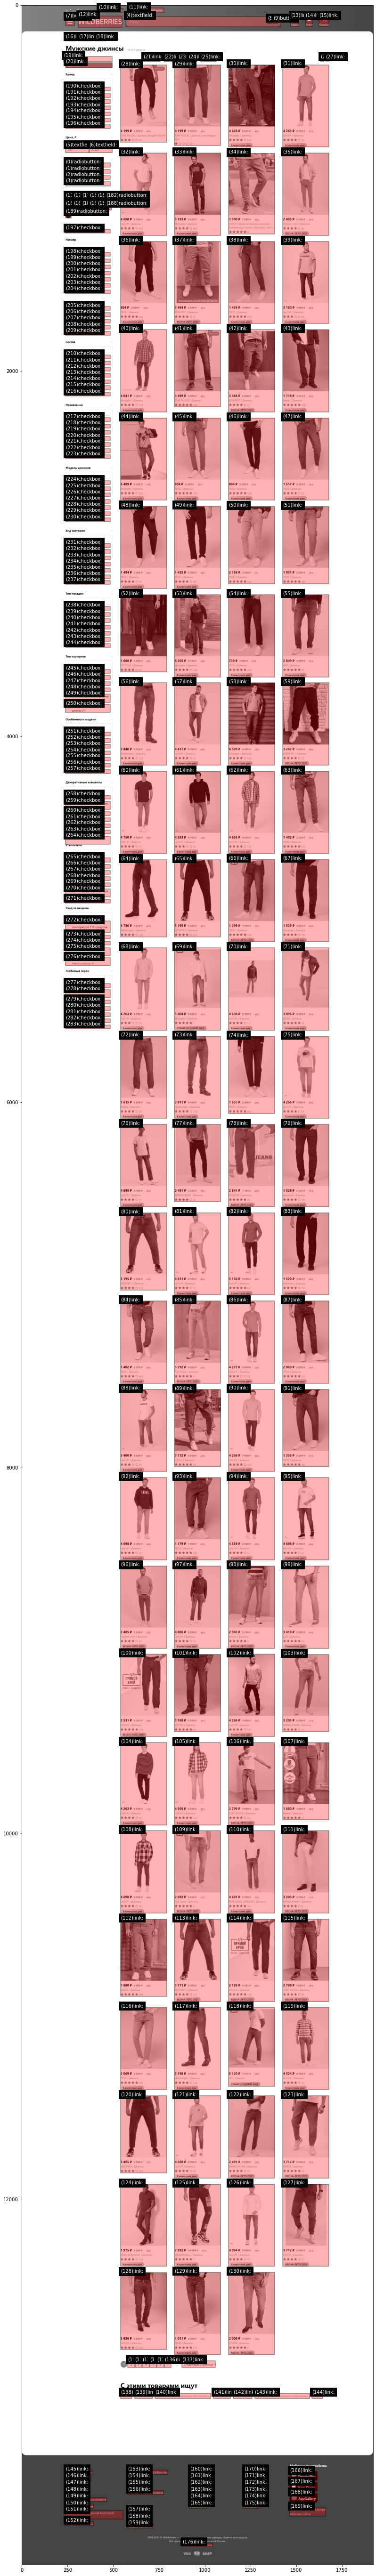

In [22]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for i, r in boxes_df.iterrows():
    x, y, w, h = from_yolo(r.x, r.y, r.width, r.height, img_width=img_width, img_height=img_height)    
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    axes.add_patch(patch)
    plt.text(x, y, 
             f'({i})' + decoder_dict[r.label] + ':',  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
    

In [23]:
# df = pd.read_parquet(f'dataset/df/{DATASET_NAME}.parquet')
df.columns

Index(['attributes', 'displayed', 'element_id', 'height', 'onmouseenter',
       'onmouseover', 'parent_id', 'style', 'tag_name', 'text', 'width', 'x',
       'y', 'is_hidden', 'upper_sibling', 'lower_sibling', 'siblings'],
      dtype='object')

In [24]:
df = assign_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=img_width, img_height=img_height)

2021-06-03 16:52:10,769 -INFO - labels:labels.py:20 - Assign labels from annotation file: dataset/annotations/wildberries.txt
2021-06-03 16:52:10,770 -INFO - labels:labels.py:22 - Getting image size
2021-06-03 16:52:10,771 -INFO - labels:labels.py:24 - Image size (w,h): (1920, 14000)
2021-06-03 16:52:10,772 -INFO - labels:labels.py:29 - {'button': 0, 'link': 1, 'textfield': 2, 'dropdown': 3, 'checkbox': 4, 'radiobutton': 5, 'textarea': 6, 'fileinput': 7, 'iframe': 8, 'range': 9, 'progressbar': 10, 'datetimeselector': 11, 'colorpicker': 12, 'numberselector': 13, 'dropdownselector': 14, 'table': 15, 'n/a': 16}
2021-06-03 16:52:10,773 -INFO - labels:labels.py:37 - getting "n/a" class code
2021-06-03 16:52:10,773 -INFO - labels:labels.py:44 - "n/a" class code: 16
2021-06-03 16:52:10,777 -INFO - labels:labels.py:54 - 284 annotation bas benn read


Assign labels:   0%|          | 0/284 [00:00<?, ?it/s]

2021-06-03 16:55:13,509 -INFO - labels:labels.py:105 - 284 labels have been assigned


In [25]:
# df = build_labels(df=df, annotations_file_path=f'dataset/annotations/{DATASET_NAME}.txt', img_width=0, img_height=0)

In [26]:
df.label.value_counts()

16    6687
1      167
4       94
5       17
0        3
2        3
Name: label, dtype: int64

1920 14000


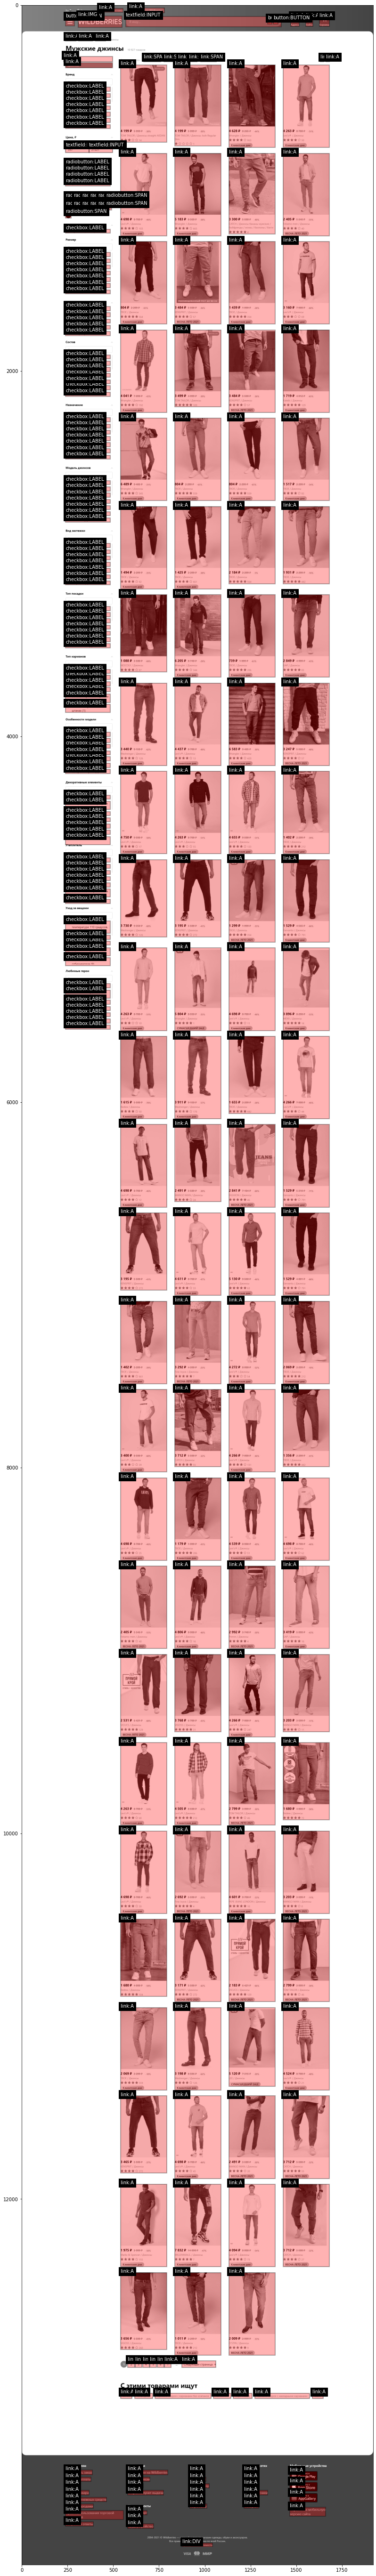

In [27]:
img = load_gray_image(f'dataset/images/{DATASET_NAME}.png')
img_height, img_width = img.shape
print(img_width, img_height)
plt.figure(figsize=(15, 100))
plt.imshow(img, cmap='gray')
axes = plt.gca()

for _, r in df[df.label_text != 'n/a'].iterrows():
    x, y, w, h = r.x, r.y, r.width, r.height  
    patch = patches.Rectangle((x, y), w, h, linewidth=2, alpha = .3, facecolor = 'red', edgecolor ='black')
    
    # print(r.tag_name, r.label_text, (x,y,w,h), r.element_id)
    
    axes.add_patch(patch)
    plt.text(x, y, 
             decoder_dict[r.label] + ':' + r.tag_name, # + ':' + str((x, y, w, h)),  ## + r.element_id, 
             fontsize = 10, 
             color = 'white', 
             backgroundcolor='black',
             alpha=1.)
